<a href="https://colab.research.google.com/github/Anonymous143w/TP/blob/main/Tesla_Stock_Analysis/Tesla_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv('/content/tesla_data.csv')


In [3]:
numeric_stats = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Cumulative Open', 'Price Change']].describe()
range_values = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Cumulative Open', 'Price Change']].max() - df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Cumulative Open', 'Price Change']].min()

# (MAD) for 'Close' and 'Volume'
def mad(data):
  median = np.median(data)
  mad = np.median(np.abs(data - median))
  return mad

mad_close = mad(df['Close'])
mad_volume = mad(df['Volume'])

In [4]:
print("Basic Statistics:")
print(numeric_stats)
print("\nRange Values:")
print(range_values)
print("\nMedian Absolute Deviation (MAD):")
print(f"MAD for 'Close': {mad_close:.2f}")
print(f"MAD for 'Volume': {mad_volume:.2f}")


Basic Statistics:
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   208.540438  213.040358  203.648127  208.426494  208.426494   
std     48.217368   48.610792   47.720669   48.145007   48.145007   
min    103.000000  111.750000  101.809998  108.099998  108.099998   
25%    176.635002  182.419998  172.504997  178.474998  178.474998   
50%    198.539993  203.000000  192.889999  197.580002  197.580002   
75%    249.385002  253.034996  242.389999  249.570000  249.570000   
max    308.290009  313.799988  305.579987  309.070007  309.070007   

             Volume  Cumulative Open  Price Change  
count  2.510000e+02       251.000000    250.000000  
mean   1.274835e+08     26010.168127     -0.161000  
std    4.724183e+07     13961.264129      8.194105  
min    4.186470e+07       282.829987    -24.360001  
25%    9.351960e+07     15209.229912     -6.415005  
50%    1.219993e+08     25352.179886     -

In [5]:
X = df[['Volume']]
y = df['Close']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r_squared:.2f}")

Mean Squared Error (MSE): 1921.30
R-squared (R2): 0.25


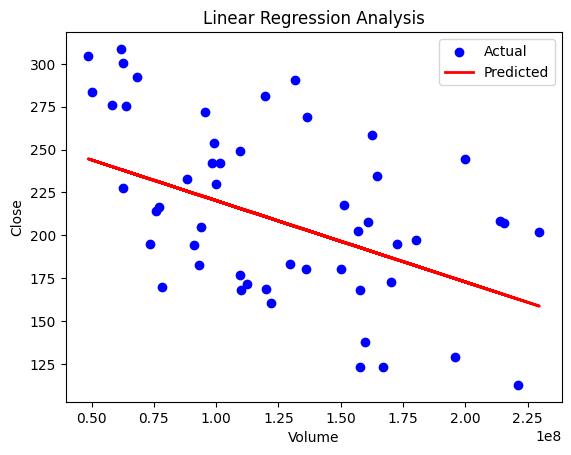

In [9]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.legend()
plt.title('Linear Regression Analysis')
plt.show()

In [10]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

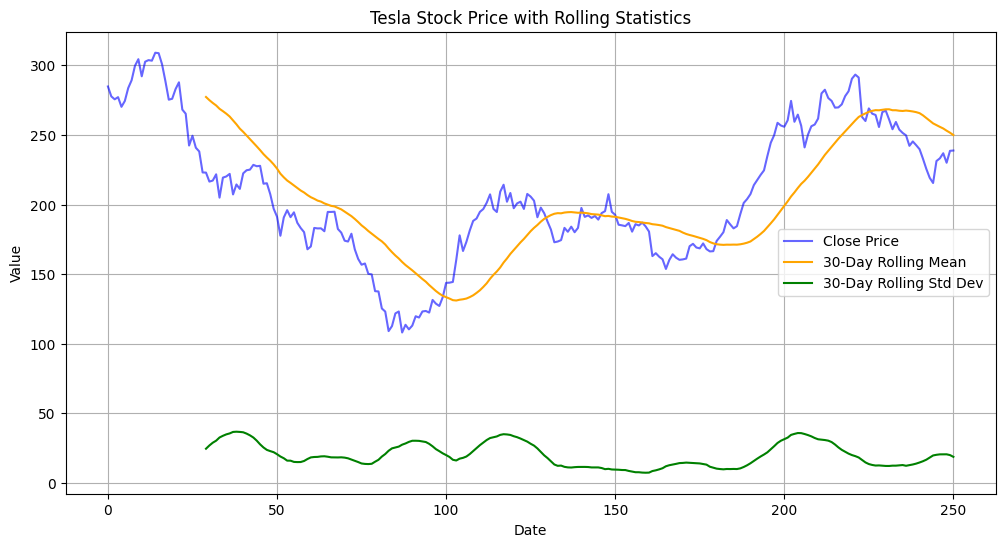

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(rolling_mean.index, rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std.index, rolling_std, label='30-Day Rolling Std Dev', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Tesla Stock Price with Rolling Statistics')
plt.legend()
plt.grid(True)
plt.show()

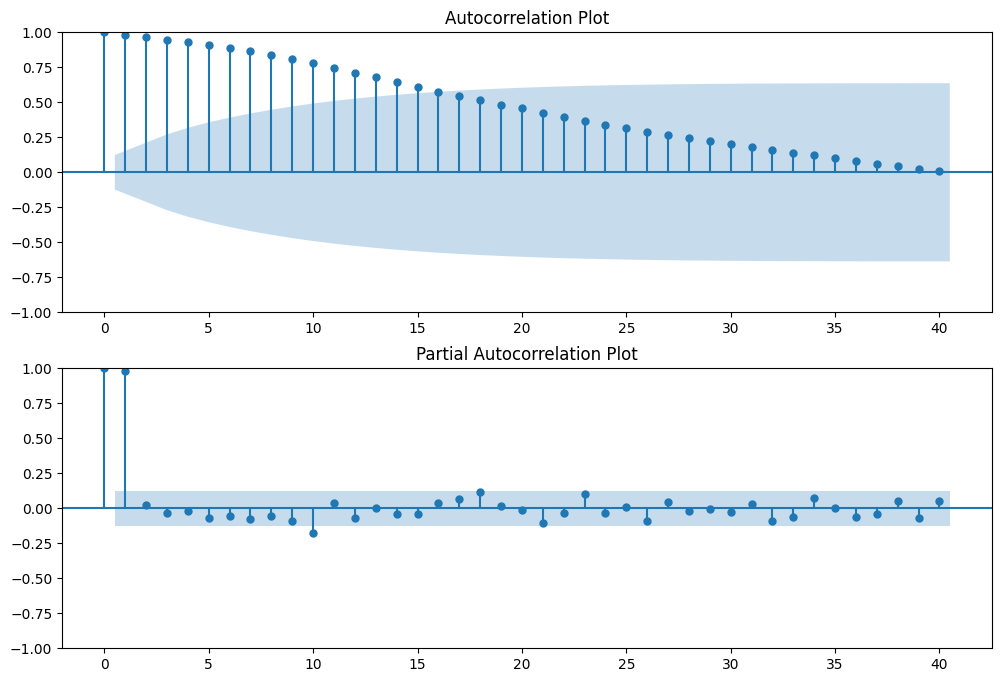

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Close'], lags=40, ax=ax1)
plot_pacf(df['Close'], lags=40, ax=ax2)
ax1.set_title('Autocorrelation Plot')
ax2.set_title('Partial Autocorrelation Plot')
plt.show()

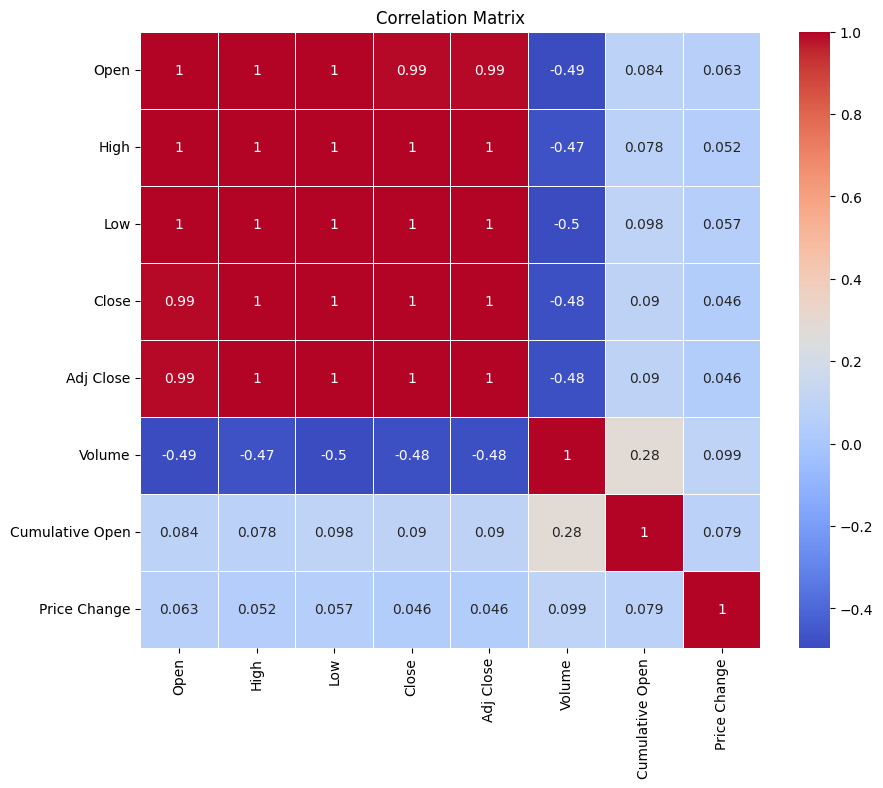

In [16]:
# Correlation Analysis
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Outlier Detection

close_data = df['Close']

Q1 = close_data.quantile(0.25)
Q3 = close_data.quantile(0.75)
IQR = Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
outliers = close_data[(close_data < lower_bound) | (close_data > upper_bound)]
print("Outliers in 'Close' column:", outliers)


Outliers in 'Close' column: Series([], Name: Close, dtype: float64)


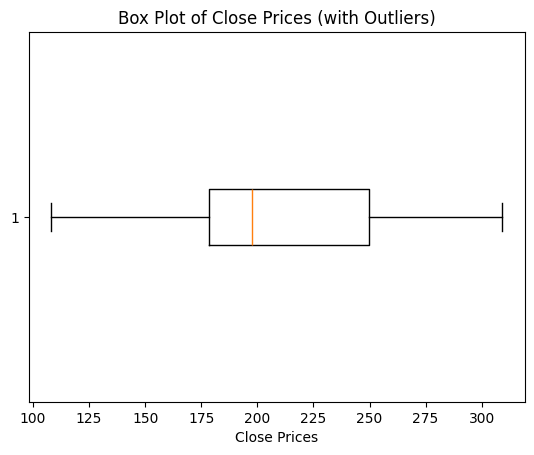

In [22]:
plt.boxplot(close_data, vert=False)
plt.title('Box Plot of Close Prices (with Outliers)')
plt.xlabel('Close Prices')
plt.show()

In [28]:
# LAG Analysis
"""
LAG Analysis. Lag analysis involves examining the relationship between variables
at different time intervals. In financial analysis, it can be used to assess how
changes in one variable (e.g., trading volume) might impact another variable
(e.g., stock price) with a time lag
"""
lag = 1
df['Volume_lagged'] = df['Volume'].shift(lag)

'''
--> we create a lagged version of the ‘Volume’ column and calculate the correlation
between the lagged ‘Volume’ and ‘Close’ columns. This will help you to assess
whether there is a relationship between trading volume on one day and the closing
price on the following day, with a lag of 1 day.
--> You can go and adjust the lag value or explore other lagged relationships between
variables
'''

'\n--> we create a lagged version of the ‘Volume’ column and calculate the correlation\nbetween the lagged ‘Volume’ and ‘Close’ columns. This will help you to assess\nwhether there is a relationship between trading volume on one day and the closing\nprice on the following day, with a lag of 1 day.\n--> You can go and adjust the lag value or explore other lagged relationships between\nvariables\n'

In [29]:
correlation = df[['Volume_lagged', 'Close']].corr().iloc[0, 1]

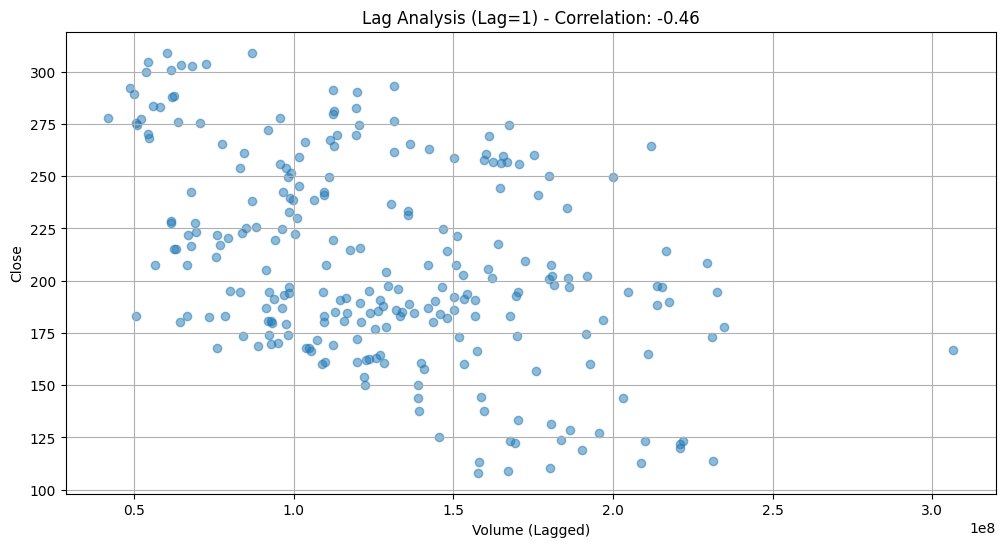

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Volume_lagged'], df['Close'], alpha=0.5)
plt.title(f'Lag Analysis (Lag={lag}) - Correlation: {correlation:.2f}')
plt.xlabel('Volume (Lagged)')
plt.ylabel('Close')
plt.grid(True)
plt.show()


# **Event Analysis**

In [31]:
events = [
{'date': '2023-01-15', 'event': 'Product Announcement'},
{'date': '2023-05-10', 'event': 'Earnings Release'},
]

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

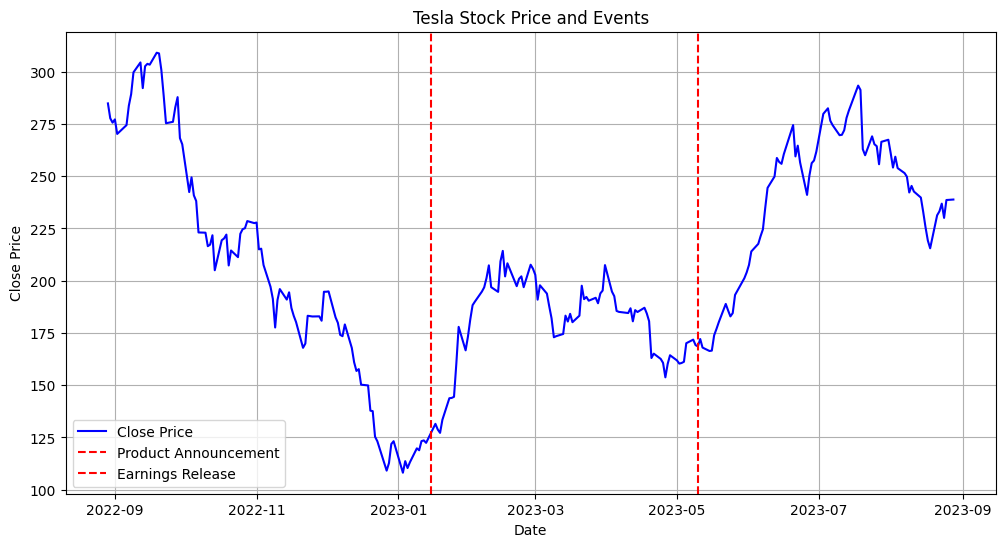

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

for event in events:
  event_date = pd.to_datetime(event['date'])
  plt.axvline(event_date, color='red', linestyle='--', label=event['event'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price and Events')
plt.legend()
plt.grid(True)
plt.show()

# **Moving Average**

In [41]:
sma_10 = df['Close'].rolling(window=10).mean()
sma_50 = df['Close'].rolling(window=50).mean()

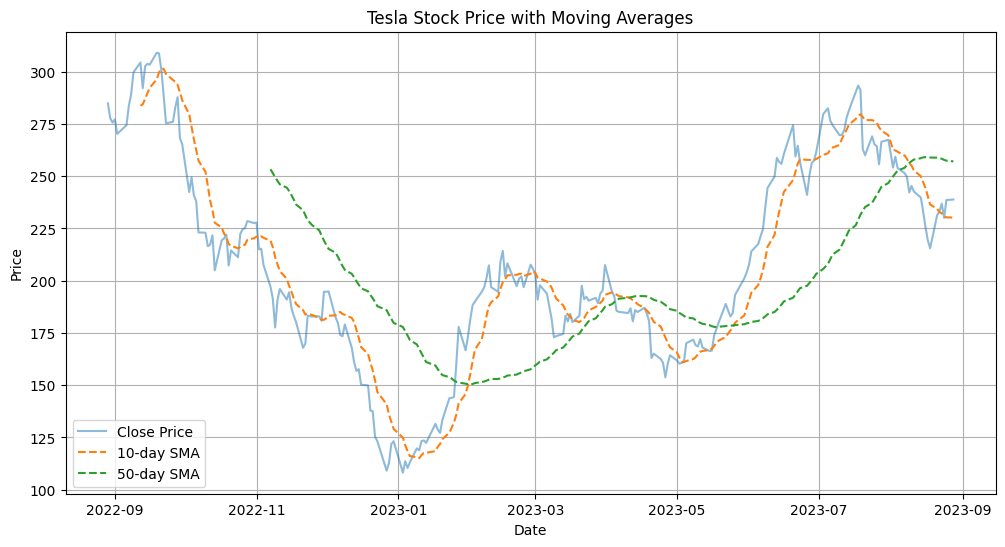

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], sma_10, label='10-day SMA', linestyle='--')
plt.plot(df['Date'], sma_50, label='50-day SMA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


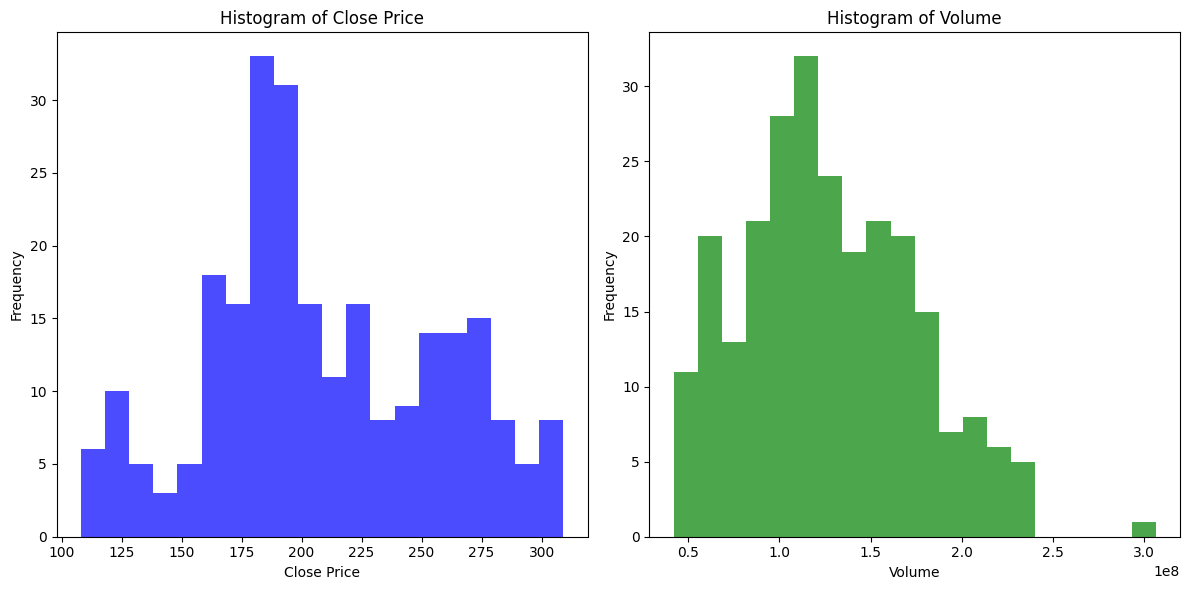

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Close'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Price')
plt.subplot(1, 2, 2)
plt.hist(df['Volume'], bins=20, color='green', alpha=0.7)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Volume')
plt.tight_layout()
plt.show()

# **Risk Management**

In [44]:
close_prices = df['Close']
# Calculate daily returns
returns = close_prices.pct_change().dropna()

In [45]:
confidence_level = 0.95
investment_amount = 100000
var = np.percentile(returns, 100 * (1 - confidence_level))
potential_loss = var * investment_amount

In [47]:
print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence: {var:.2%}")
print(f"Potential loss for an investment of ${investment_amount:,.0f}: ${potential_loss:,.2f}")


Value at Risk (VaR) at 95.0% confidence: -6.35%
Potential loss for an investment of $100,000: $-6,348.70


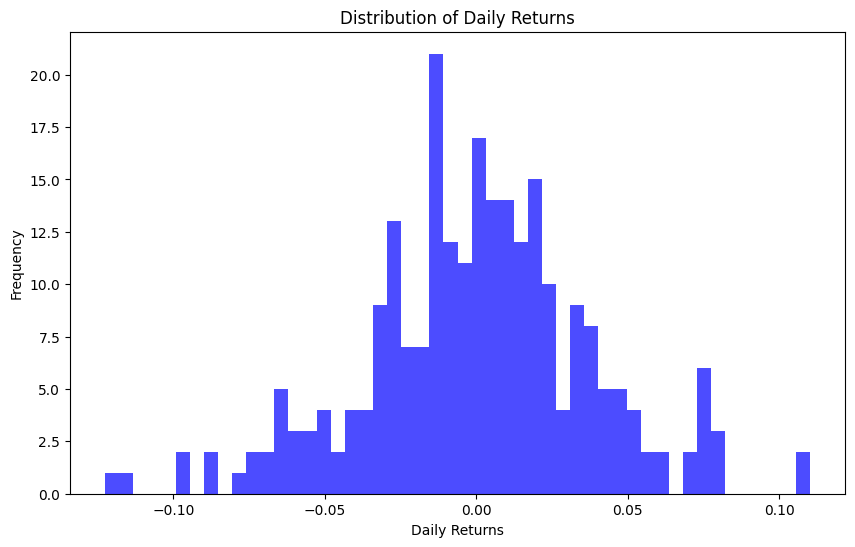

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.7, color='b')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

'''
--> We calculate daily returns based on the ‘Close’ prices.You can set the confidence
level to your desired value (e.g., 0.95 for 95% confidence) and specify your investment amount.We calculate VaR using the historical method, which estimates VaR
based on historical return data.We calculate the potential loss for your specified
investment amount
--> This code will provide you with the VaR and potential loss for your investment
based on historical data. Adjust the confidence level and investment amount as
needed
'''

# **Fundamental Analysis**

In [50]:
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

np.random.seed(0)
eps_values = np.random.uniform(1, 5, size=len(date_range))
eps_df = pd.DataFrame({'date': date_range, 'EPS': eps_values})

eps_df.to_csv('/content/earnings_per_share.csv', index=False)
print("EPS data saved to earnings_per_share.csv")

EPS data saved to earnings_per_share.csv


In [117]:
!pip install yfinance

In [165]:
import yfinance as yf
stock_symbol = 'TSLA'
start_date = '2022-01-01'
end_date = '2022-12-31'
tesla_data = yf.download(stock_symbol, start=start_date, end=end_date)
tesla_data = tesla_data.reset_index()
tesla_data.to_csv('/content/tesla_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [166]:
df = pd.read_csv('/content/tesla_stock_data.csv')

In [167]:
print(df.columns)

Index(['Price', 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [168]:
eps_df = pd.read_csv('/content/earnings_per_share.csv')

In [169]:
# Make both columns timezone-naive
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
eps_df['date'] = pd.to_datetime(eps_df['date']).dt.tz_localize(None)

# Merge on the 'Date' column
merged_df = pd.merge(df, eps_df, left_on='Date', right_on='date', how='inner')

print(merged_df.dtypes)


Price                object
Date         datetime64[ns]
Adj Close            object
Close                object
High                 object
Low                  object
Open                 object
Volume               object
date         datetime64[ns]
EPS                 float64
dtype: object


In [171]:
# Convert 'Close' and 'EPS' to numeric, coercing errors
merged_df['Close'] = pd.to_numeric(merged_df['Close'], errors='coerce')
merged_df['EPS'] = pd.to_numeric(merged_df['EPS'], errors='coerce')


In [172]:
# Drop rows with NaN values in 'Close' or 'EPS'
merged_df = merged_df.dropna(subset=['Close', 'EPS'])


In [173]:
# Calculate PE ratio
merged_df['PE_ratio'] = merged_df['Close'] / merged_df['EPS']
print(merged_df[['Date', 'PE_ratio']])


          Date    PE_ratio
0   2022-01-03  117.244325
1   2022-01-04  120.519802
2   2022-01-05  134.604053
3   2022-01-06   99.035140
4   2022-01-07  124.464214
..         ...         ...
246 2022-12-23   58.354299
247 2022-12-27   62.395498
248 2022-12-28   24.417584
249 2022-12-29   38.365800
250 2022-12-30   43.562742

[251 rows x 2 columns]


In [174]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

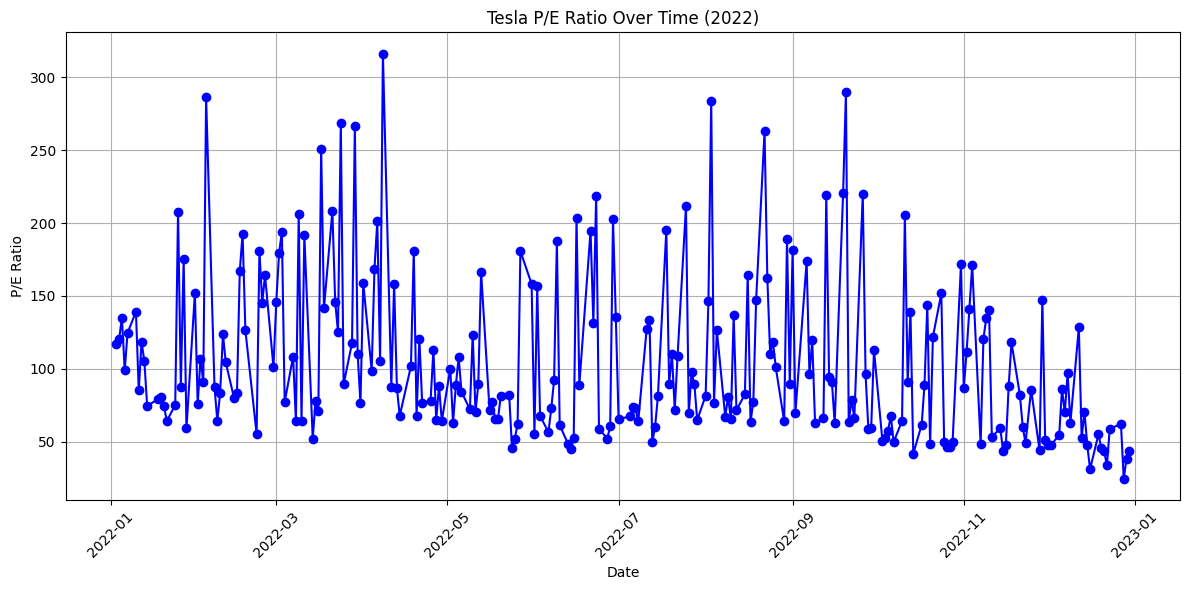

In [175]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['PE_ratio'], marker='o', linestyle='-',color='b')
plt.title('Tesla P/E Ratio Over Time (2022)')
plt.xlabel('Date')
plt.ylabel('P/E Ratio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Technical Analysis**

In [297]:
df = pd.read_csv('/content/tesla_stock_data.csv')

In [298]:
window_10 = 10
window_50 = 50

In [299]:
print(df.columns)


Index(['Price', 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [300]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

In [301]:
df['MA_10'] = df['Close'].rolling(window=window_10).mean()
df['MA_50'] = df['Close'].rolling(window=window_50).mean()

In [302]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [303]:
df = df.dropna(subset=['Date'])


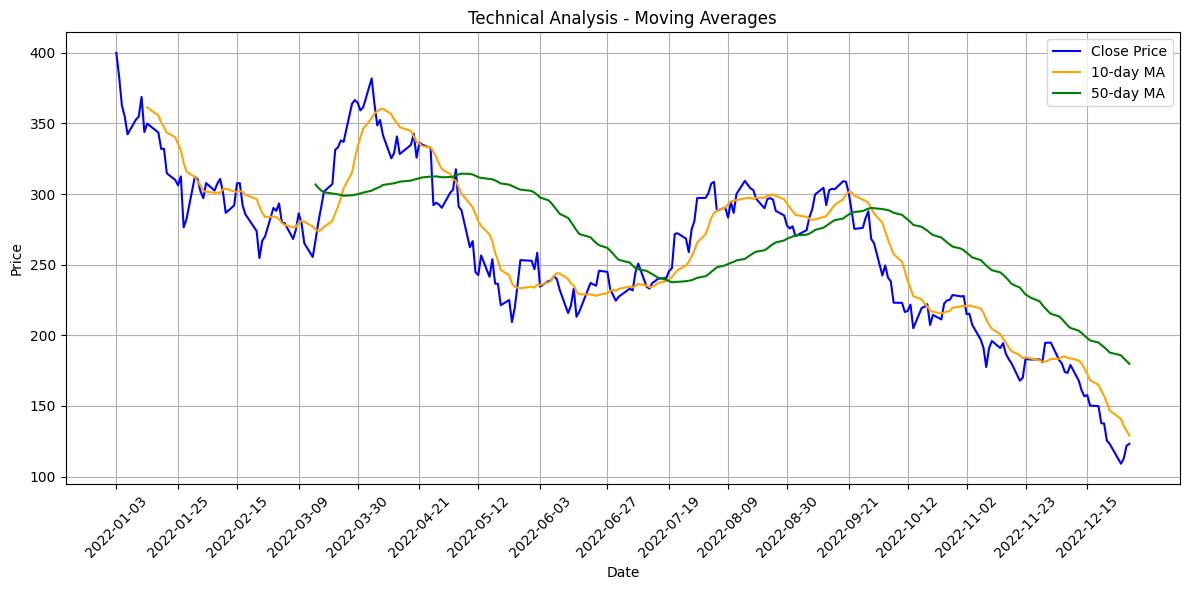

In [304]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_10'], label='10-day MA', color='orange')
plt.plot(df['Date'], df['MA_50'], label='50-day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Technical Analysis - Moving Averages')
plt.legend()
plt.grid(True)
plt.xticks(df['Date'][::15], rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

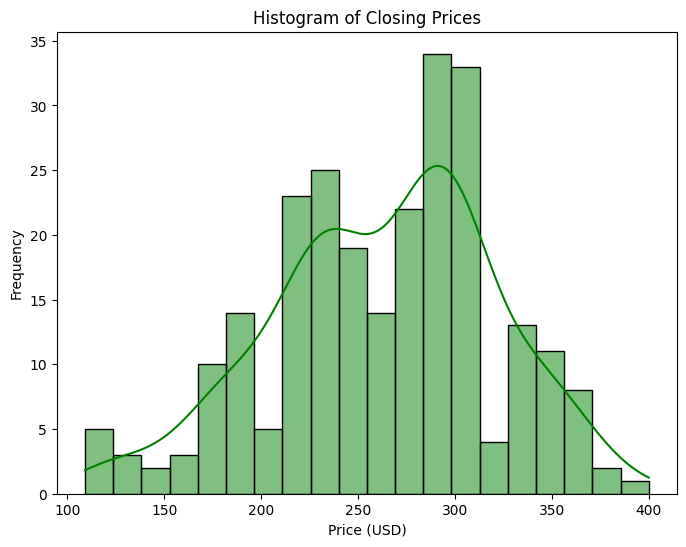

In [305]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='green')
plt.title('Histogram of Closing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Box Plot of Closing Prices')

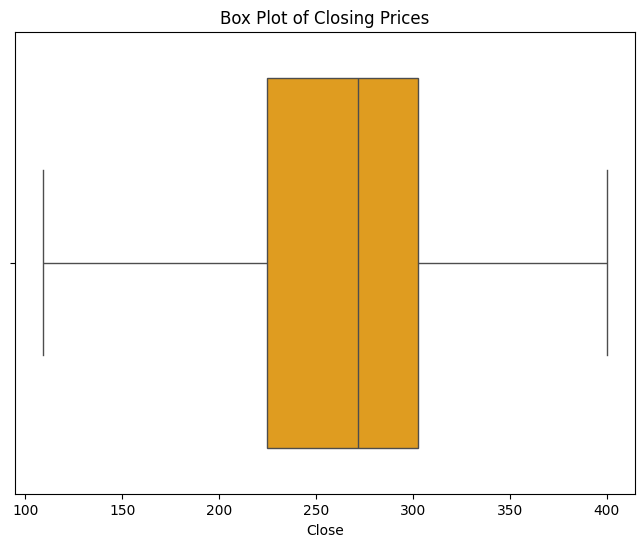

In [213]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'], color='orange')
plt.title('Box Plot of Closing Prices')

# **Predictive Models**

In [306]:
df = pd.read_csv('/content/tesla_stock_data.csv')

In [307]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
tsla_close = pd.to_numeric(df['Close'], errors='coerce')

In [308]:
train_size = int(len(tsla_close) * 0.8)
train, test = tsla_close[:train_size], tsla_close[train_size:]

In [309]:
train = train.dropna()

# **Model1: Auto-ARIMA:**

In [239]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.3 MB/s eta 0:00:00


In [310]:
# Automatically determine the best p, d, q values
auto_model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Train the best ARIMA model
model_fit = auto_model.fit(train)

# Predict on the test set
forecast = model_fit.predict(n_periods=len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1523.298, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1538.370, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1539.779, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1539.814, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1537.608, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1542.680, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1542.741, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1540.933, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1541.619, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1543.936, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [311]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print(f"Auto-ARIMA MSE: {mse}")

Auto-ARIMA MSE: 603.3635966583414


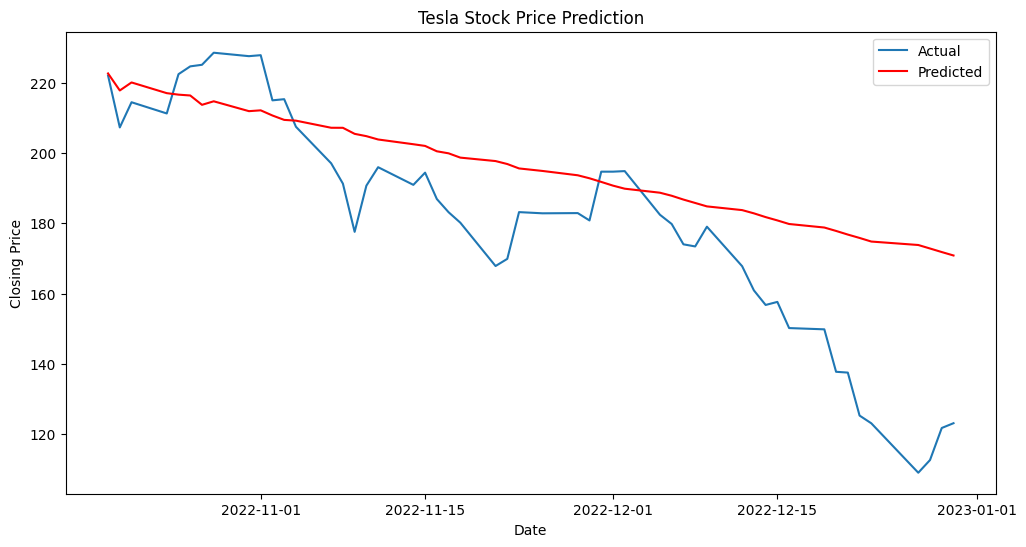

In [312]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, color='red', label='Predicted')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show() # Add this line to display the plot

# **Model 2: SARIMA (Seasonal ARIMA)**

In [313]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Specify the SARIMA model (p, d, q) x (P, D, Q, S) where S is the season length
sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecast
forecast2 = sarima_fit.forecast(steps=len(test))

# Evaluate
mse = mean_squared_error(test, forecast)
print(f"SARIMA MSE: {mse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA MSE: 603.3635966583414


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


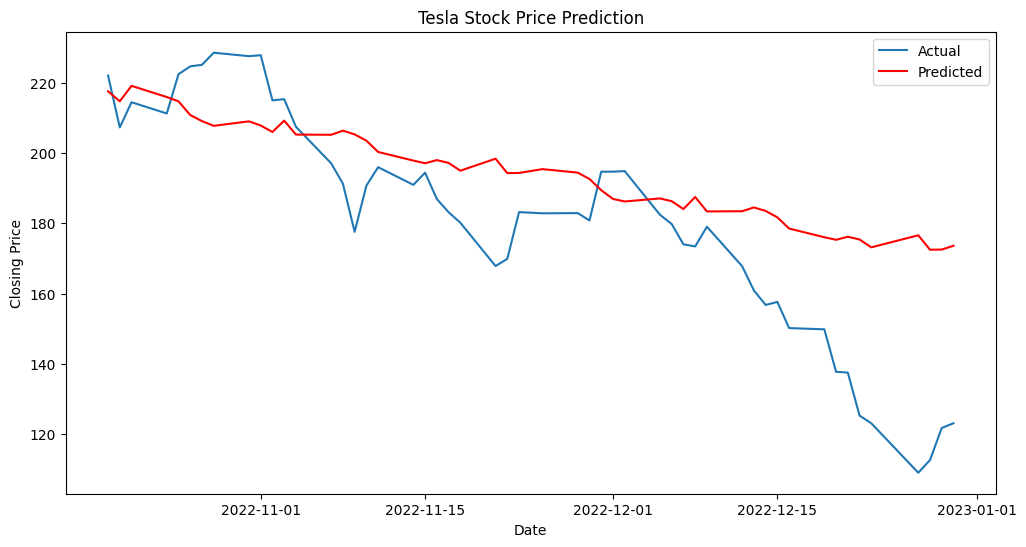

In [319]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast2, color='red', label='Predicted')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show() # Add this line to display the plot

# **Model 3: LSTM**



In [323]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Create LSTM input sequences
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Evaluate
mse = mean_squared_error(scaler.inverse_transform(y_test), y_pred)
print(f"LSTM MSE: {mse}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1989
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0398 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0357 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0181
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0207 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0176
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0145
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0139 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0139 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0130
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/st

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
LSTM MSE: 1246.0788714255962


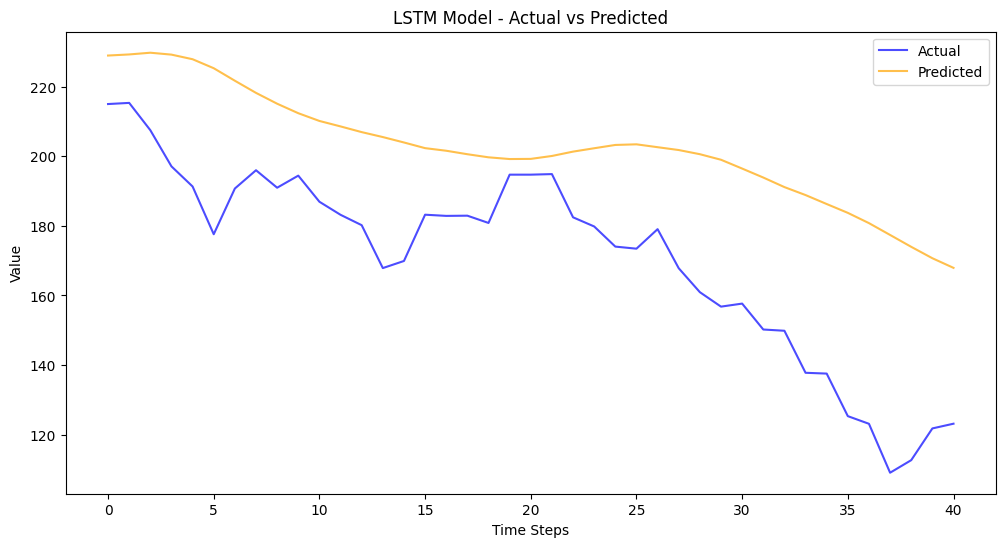

In [324]:
import matplotlib.pyplot as plt

# Inverse transform y_test to its original scale
y_test_original = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted', color='orange', alpha=0.7)
plt.legend()
plt.title('LSTM Model - Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


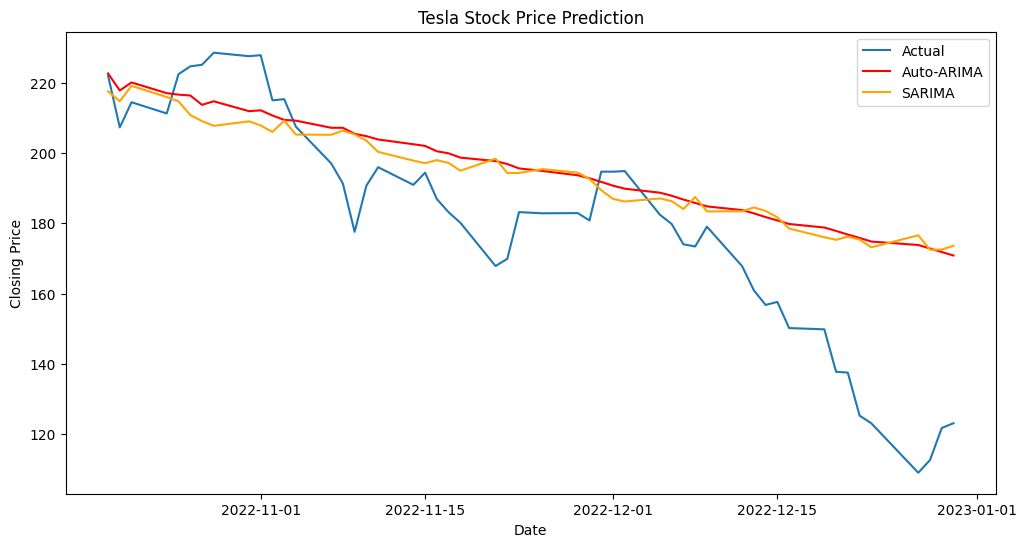

In [329]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast, color='red', label='Auto-ARIMA')
plt.plot(test.index, forecast2, color='orange', label='SARIMA')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show() # Add this line to display the plot